In [40]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [41]:
data = pd.read_csv(r'C:\Users\matui\Downloads\iris-data.csv')

In [42]:
#First overview
data.head(10)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa


In [43]:
#Dimension of df
data.shape

(150, 5)

In [44]:
#Having col names could be usefull for future usage
data.columns

Index(['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm',
       'petal_width_cm', 'class'],
      dtype='object')

In [45]:
#Here we can get a first idea of metrics and missing values
data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [46]:
#Missing values (5 values to fill)
data.isna().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

In [47]:
#Filling missing values with mean
replace = data['petal_width_cm'].mean()
data['petal_width_cm'] = np.where(data['petal_width_cm'].isna()==True, replace, data['petal_width_cm'])

In [48]:
#Last column value counts (6 values to change)
data['class'].value_counts()

Iris-virginica     50
Iris-setosa        49
Iris-versicolor    45
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

In [49]:
data['class'] = np.where(data['class'].str.contains('versicolor'), 'Iris-versicolor', data['class'])
data['class'] = np.where(data['class'].str.contains('Iris-setossa'), 'Iris-setosa', data['class'])

<AxesSubplot:>

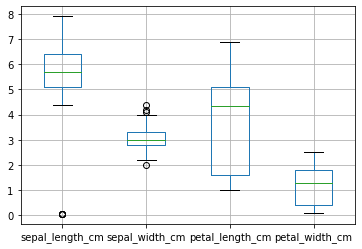

In [50]:
#Distribution plot
data.boxplot(column=['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm'])

In [51]:
#We can tell that there are outliers
#Taking care of outliers
def delete_outliers(column_list):
    for column in column_list:
        Q3 = data[column].quantile(0.75)
        Q1 = data[column].quantile(0.25)
        IQR = Q3 - Q1
        # cleaned = data[(data[column] > (Q3 + 1.5* IQR)) & (data[column] < (Q3 - 1.5* IQR))]
        data.drop(data[data[column] < (Q3 - 1.5* IQR)].index, inplace=True)
        data.drop(data[data[column] > (Q3 + 1.5* IQR)].index, inplace=True)

In [52]:
col = ['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm']
delete_outliers(col)

In [53]:
data

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [54]:
data.to_csv(r'C:\Users\matui\Downloads\iris-data_cleaned.csv')